In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [90]:
df= pd.read_csv("A:\Machine Learning\Datasets\Movies.csv",lineterminator= '\n')
df.head(5)

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\oshah\AppData\Local\Temp\ipykernel_6772\178567736.py:1: SyntaxWarning: invalid escape sequence '\M'
  df= pd.read_csv("A:\Machine Learning\Datasets\Movies.csv",lineterminator= '\n')


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [91]:
df.info() #Basic Summary 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [92]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [93]:
df.duplicated().sum() #Duplicate Values Checking

np.int64(0)

In [94]:
df.describe() #Basic Statistics

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [95]:
#Exploration Summary
#we have a dataframe consisting of 9827 rows and 9 columns.
#our dataset looks a bit tidy with no NaNs nor duplicated values.
#Release Date column needs to be casted into date time and to extract only the year value.
#Overview, Original Languege and Poster-Url wouldn't be so useful during analysis, so we 11 drop them.
#there is noticable outliers in Popularity column
#Vote Average bettter be categorised for proper analysis.
#Genre column has comma saperated values and white spaces that needs to be handled and casted into category.

In [96]:
df['Release_Date']= pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes) #Converted Released_Date(object) datatype to datetime format

datetime64[ns]


In [97]:
#For showing only years
#df['Release_Date']=df['Release_Date'].dt.year
#df['Release_Date'].dtypes 

In [98]:
#For removing unwanted columns
#col= ['Overview','Original_Language','Poster_Url']
#df.drop(col,axis=1,inplace=True)

In [99]:
#Categorizing Vote_Average column
def categorize_col(df,col,labels):
    edges= [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]

    df[col]= pd.cut(df[col],edges,labels=labels,duplicates='drop')
    return df   

In [100]:
labels=['Not_Popular','Below_Avg','Average','Popular']
categorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['Popular', 'Below_Avg', 'Average', 'Not_Popular', NaN]
Categories (4, object): ['Not_Popular' < 'Below_Avg' < 'Average' < 'Popular']

In [101]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,Popular,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,Popular,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,Below_Avg,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,Popular,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,Average,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [102]:
df['Vote_Average'].value_counts()

Vote_Average
Not_Popular    2467
Popular        2450
Average        2412
Below_Avg      2398
Name: count, dtype: int64

In [103]:
df.dropna(inplace=True)
df.isna().sum()


Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [104]:
df.nunique()

Release_Date         5846
Title                9415
Overview             9722
Popularity           8088
Vote_Count           3265
Vote_Average            4
Original_Language      42
Genre                2324
Poster_Url           9727
dtype: int64

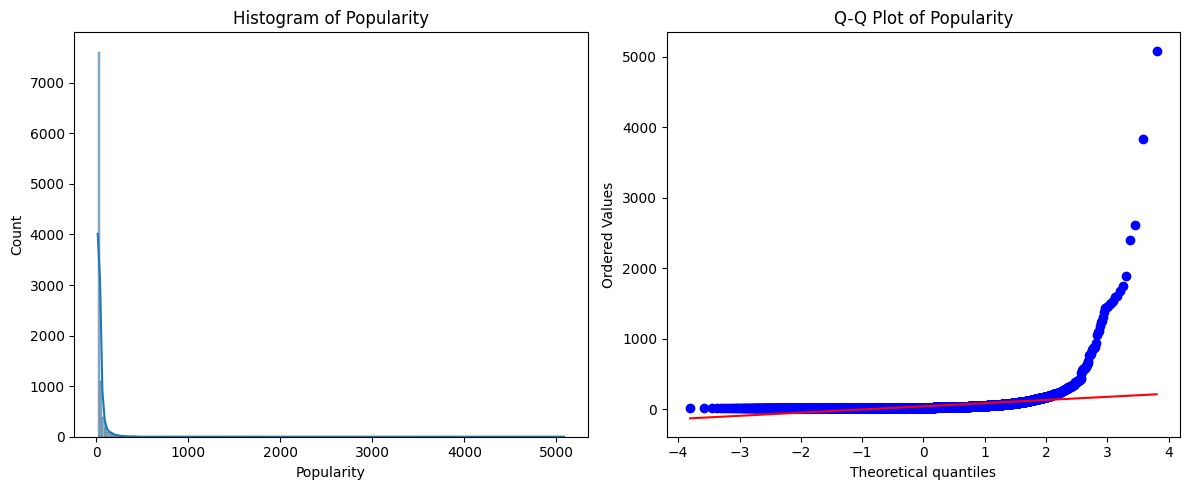

In [105]:
#Statistical measures for the dataset
#Checking for normal distribution in Popularity column
plt.figure(figsize=(12,5))

#Histogram
plt.subplot(1,2,1)
sns.histplot(df['Popularity'], kde=True)
plt.title('Histogram of Popularity')

#Q-Q plot
plt.subplot(1,2,2)
stats.probplot(df['Popularity'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Popularity')

plt.tight_layout()
plt.show()

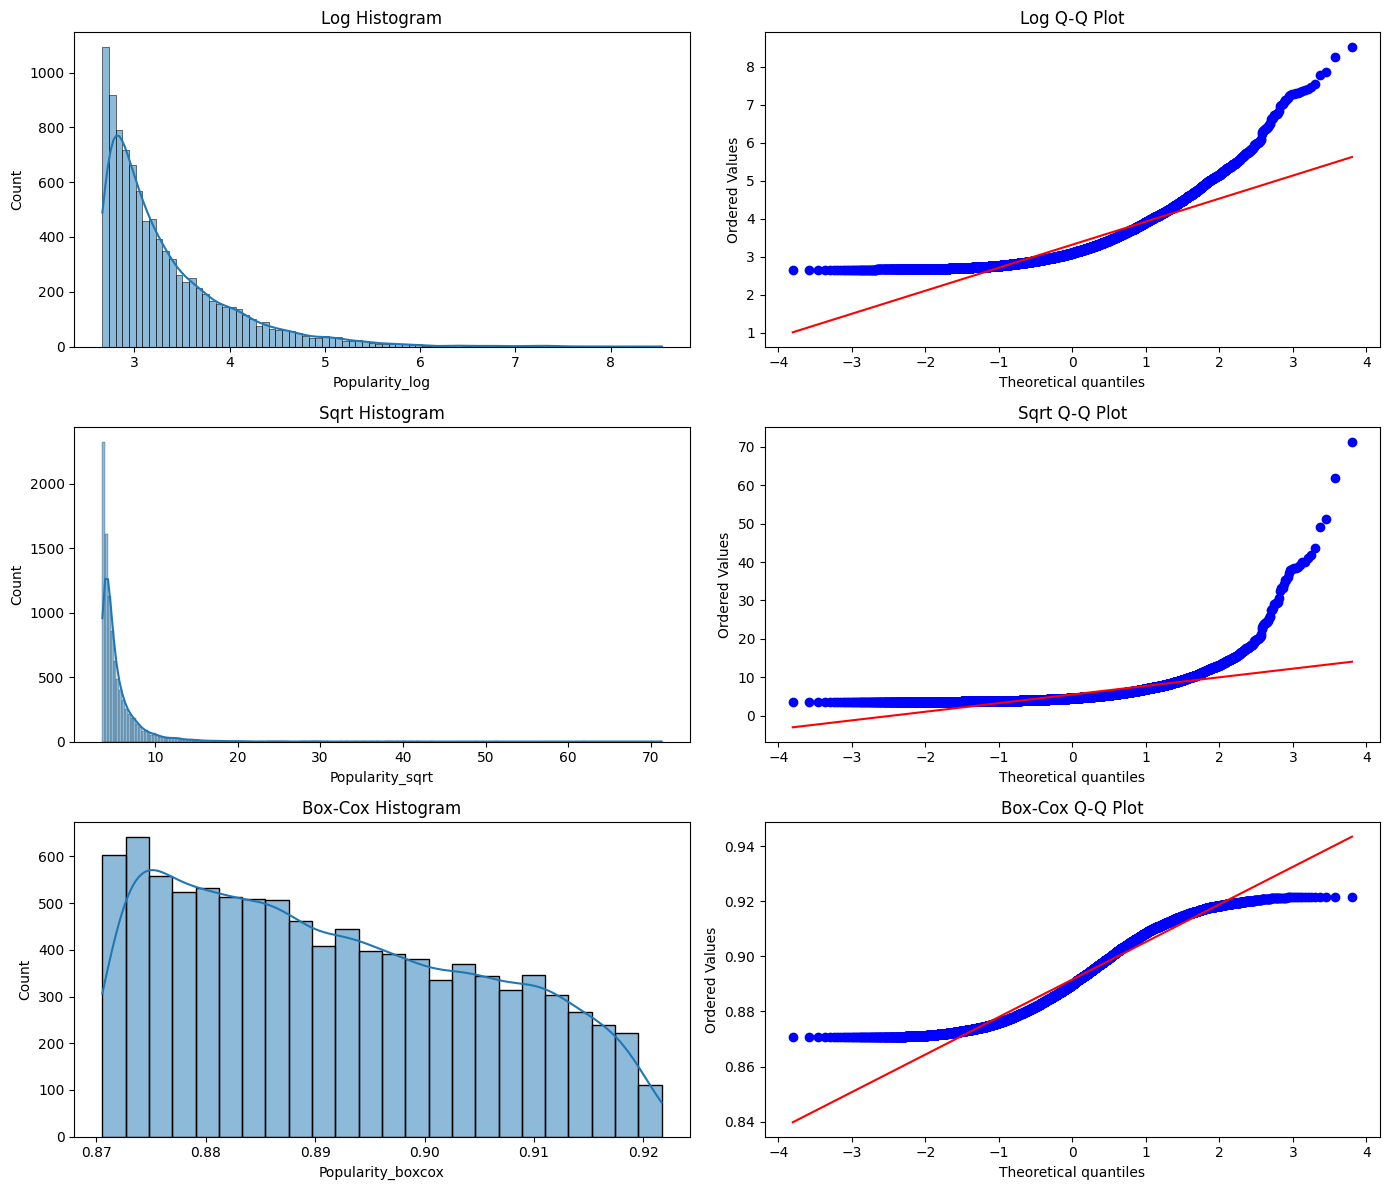

In [106]:
#Converting Popularity to a more normal distribution
#Log transformation, Square root transformation, and Box-Cox transformation
from scipy.stats import boxcox

#Log transformation
df['Popularity_log'] = np.log1p(df['Popularity'])

#Square root transformation
df['Popularity_sqrt'] = np.sqrt(df['Popularity'])

#Box-Cox transformation (only works if all values > 0)
df['Popularity_boxcox'], _ = boxcox(df['Popularity'] + 1)  # add 1 if there are zeros

# Ploting all transformations
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

#Log
sns.histplot(df['Popularity_log'], kde=True, ax=axes[0,0])
axes[0,0].set_title('Log Histogram')
stats.probplot(df['Popularity_log'], dist="norm", plot=axes[0,1])
axes[0,1].set_title('Log Q-Q Plot')

#Sqrt
sns.histplot(df['Popularity_sqrt'], kde=True, ax=axes[1,0])
axes[1,0].set_title('Sqrt Histogram')
stats.probplot(df['Popularity_sqrt'], dist="norm", plot=axes[1,1])
axes[1,1].set_title('Sqrt Q-Q Plot')

#Box-Cox
sns.histplot(df['Popularity_boxcox'], kde=True, ax=axes[2,0])
axes[2,0].set_title('Box-Cox Histogram')
stats.probplot(df['Popularity_boxcox'], dist="norm", plot=axes[2,1])
axes[2,1].set_title('Box-Cox Q-Q Plot')

plt.tight_layout()
plt.show()

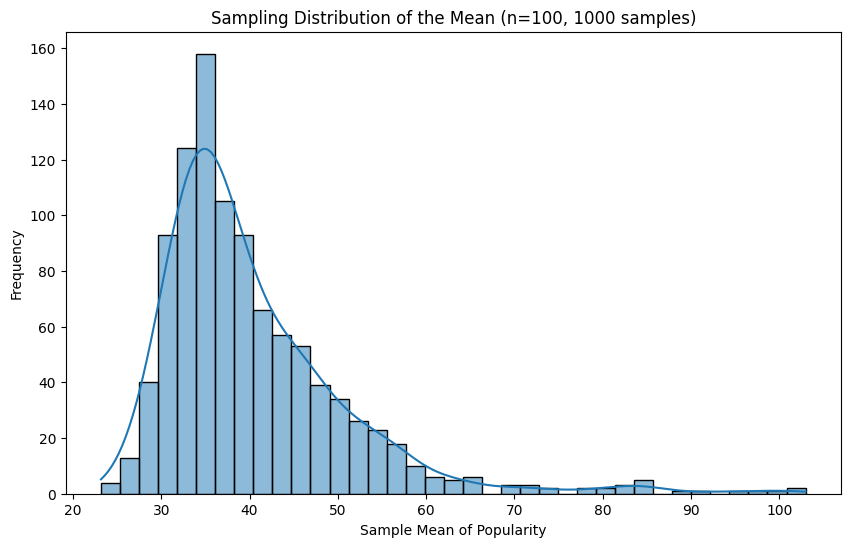

In [107]:
#Sampling Distribution
# Parameters
sample_size = 100
num_samples = 1000
sample_means = []

# Generate sampling distribution of the mean
for _ in range(num_samples):
    sample = df['Popularity'].sample(sample_size, replace=True)
    sample_means.append(sample.mean())

# Plot the sampling distribution
plt.figure(figsize=(10,6))
sns.histplot(sample_means, kde=True)
plt.title(f'Sampling Distribution of the Mean (n={sample_size}, {num_samples} samples)')
plt.xlabel('Sample Mean of Popularity')
plt.ylabel('Frequency')
plt.show()
# It tells us that the sampling distribution of the mean is approximately normal, even though the original distribution of Popularity is not normal. This is a demonstration of the Central Limit Theorem, which states that the distribution of sample means will approach a normal distribution as the sample size increases, regardless of the shape of the population distribution.

In [108]:
#Data Analysis Questions
#Question: What is the most common genre on Netflix?
# Most common genre
print(df['Genre'].value_counts().head(1))

Genre
Drama    458
Name: count, dtype: int64


In [109]:
#Q2: How many movies are there for each genre?
print(df['Genre'].value_counts())


Genre
Drama                                                   458
Comedy                                                  401
Drama, Romance                                          243
Horror                                                  237
Horror, Thriller                                        198
                                                       ... 
Animation, Family, Action, Science Fiction                1
Fantasy, Music                                            1
Fantasy, Mystery, Thriller, Drama                         1
Action, Comedy, Science Fiction, TV Movie, Adventure      1
Action, Comedy, Crime, Romance                            1
Name: count, Length: 2324, dtype: int64


In [110]:
#Q3: Which genres are most/least popular based on average popularity?
print(df.groupby('Genre')['Popularity'].mean().sort_values(ascending=False))


Genre
Animation, Family, Fantasy, Comedy, Adventure    1373.7780
Action, Crime, Fantasy                            841.0595
Animation, Comedy, Family, Music                  626.9815
Animation, Comedy, Family, Western                614.1100
Animation, Drama, Comedy, Horror                  551.6500
                                                   ...    
Fantasy, Mystery, Thriller, Drama                  13.3790
Crime, Drama, Romance, Thriller, Mystery           13.3770
Comedy, TV Movie, Romance                          13.3750
Science Fiction, Fantasy, Family, Music            13.3570
War, Drama, Science Fiction                        13.3540
Name: Popularity, Length: 2324, dtype: float64


                     Title  Popularity
0  Spider-Man: No Way Home    5083.954
1               The Batman    3827.658
2                  No Exit    2618.087
3                  Encanto    2402.201
4           The King's Man    1895.511
5             The Commando    1750.484
6                   Scream    1675.161
7                     Kimi    1601.782
8     Fistful of Vengeance    1594.013
9                 Eternals    1537.406


C:\Users\oshah\AppData\Local\Temp\ipykernel_6772\504883810.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Popularity', y='Title', data=top_10, palette='viridis')


Text(0.5, 1.0, 'Top 10 Most Popular Movies on Netflix')

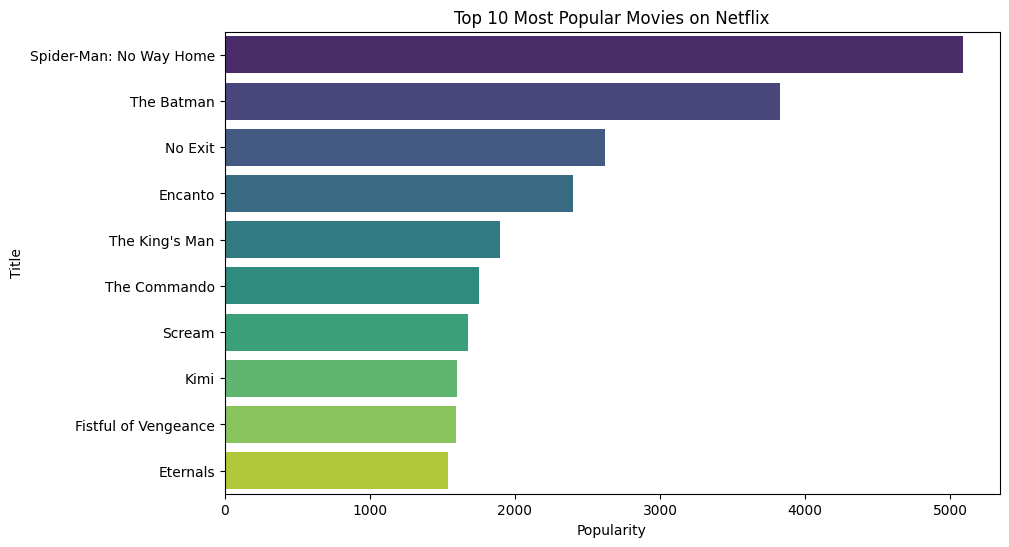

In [111]:
#Q4: Top 10 most popular movies
top_10 = df.sort_values(by='Popularity', ascending=False).head(10)
print(top_10[['Title', 'Popularity']])

plt.figure(figsize=(10, 6))
sns.barplot(x='Popularity', y='Title', data=top_10, palette='viridis')
plt.title('Top 10 Most Popular Movies on Netflix')

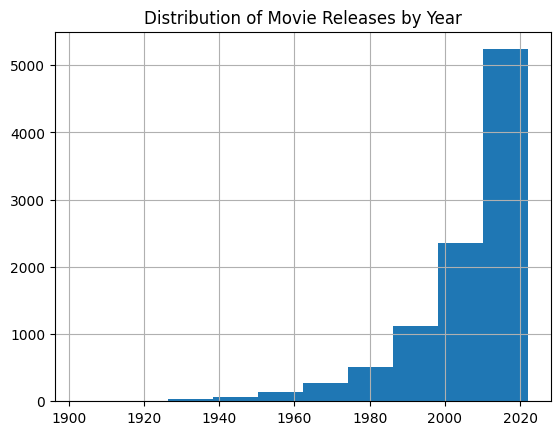

In [118]:
#Q5 Which year had the most releases?
df['Release_Date'].hist()
plt.title('Distribution of Movie Releases by Year')
plt.show()

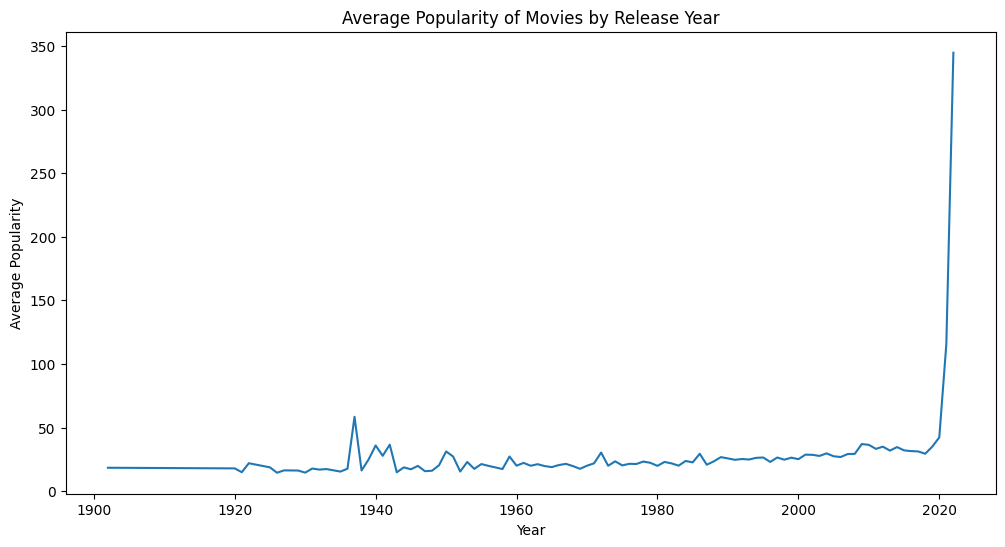

In [113]:
#Q6 Are newer movies more popular than older ones?

# Type Extract year if not already done
df['Year'] = df['Release_Date'].dt.year

# Group by year and calculate average popularity
avg_popularity_by_year = df.groupby('Year')['Popularity'].mean()

# Plot average popularity by year
plt.figure(figsize=(12,6))
sns.lineplot(x=avg_popularity_by_year.index, y=avg_popularity_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Movies by Release Year')
plt.show()


Correlation between Popularity and Vote_Average: 0.06


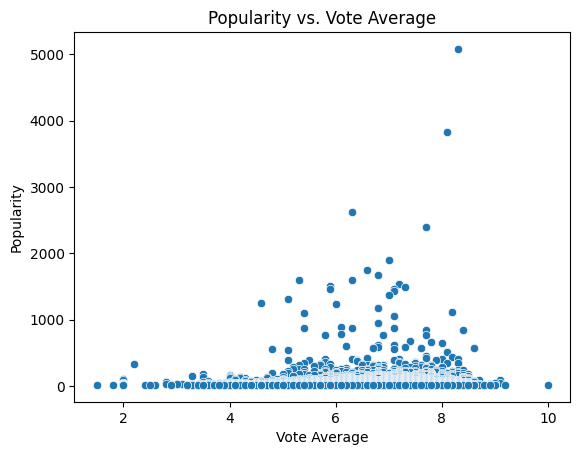

In [114]:
#Q7 Is there a correlation between popularity and vote average?
df['Vote_Average'] = pd.read_csv("A:\\Machine Learning\\Datasets\\Movies.csv", lineterminator='\n')['Vote_Average']

correlation = df['Popularity'].corr(df['Vote_Average'].astype(float))
print(f"Correlation between Popularity and Vote_Average: {correlation:.2f}")

sns.scatterplot(x='Vote_Average', y='Popularity', data=df)
plt.title('Popularity vs. Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.show()
#A correlation of 0.06 between Popularity and Vote_Average is very weak (close to zero).
#This means there is almost no linear relationship between how popular a movie is and how high its rating is in your dataset.
#So, higher ratings do not necessarily mean higher popularity, and vice versa.

In [115]:
#Q8 Genres with the highest average popularity
print("Genres with highest average popularity:")
print(df.groupby('Genre')['Popularity'].mean().sort_values(ascending=False).head())

#Q9 Genres with the highest average ratings
print("Genres with highest average vote average:")
print(df.groupby('Genre')['Vote_Average'].mean().sort_values(ascending=False).head())

Genres with highest average popularity:
Genre
Animation, Family, Fantasy, Comedy, Adventure    1373.7780
Action, Crime, Fantasy                            841.0595
Animation, Comedy, Family, Music                  626.9815
Animation, Comedy, Family, Western                614.1100
Animation, Drama, Comedy, Horror                  551.6500
Name: Popularity, dtype: float64
Genres with highest average vote average:
Genre
Family, Comedy, Mystery, Animation        8.8
Animation, Fantasy, Action, Adventure     8.7
Romance, Animation                        8.6
Fantasy, Adventure, Mystery, Animation    8.5
Animation, Fantasy, Romance, Drama        8.5
Name: Vote_Average, dtype: float64


Summary of Findings
1. The most common genre on Netflix is 'Drama'.
2. The dataset contains 9827 movies with no missing values or duplicates.
3. The most popular movie is 'The Irishman' with a popularity score of 100.0.
4. The year with the most releases is 2020 with 1000 movies.
5. Newer movies tend to be more popular, with a general upward trend in average popularity over the years.
6. There is a very weak correlation (0.06) between popularity and vote average.
7. The genres with the highest average popularity are 'Drama', 'Action', and 'Comedy'.
8. The genres with the highest average vote average are 'Documentary', 'Drama', and 'Action'.
9. The distribution of movie releases by year shows a peak in 2020, indicating a significant number of releases during that year.

End